<a href="https://colab.research.google.com/github/DeadLeaf739/Data-analytics-portfolio/blob/main/data-science-salary-analysis/salary_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
df = pd.read_csv('ds_salaries.csv')
print(df)

     Unnamed: 0  work_year experience_level employment_type  \
0             0       2020               MI              FT   
1             1       2020               SE              FT   
2             2       2020               SE              FT   
3             3       2020               MI              FT   
4             4       2020               SE              FT   
..          ...        ...              ...             ...   
602         602       2022               SE              FT   
603         603       2022               SE              FT   
604         604       2022               SE              FT   
605         605       2022               SE              FT   
606         606       2022               MI              FT   

                      job_title  salary salary_currency  salary_in_usd  \
0                Data Scientist   70000             EUR          79833   
1    Machine Learning Scientist  260000             USD         260000   
2             Big Dat

In [ ]:
df.info()
df.describe()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


,0
Unnamed: 0,int64
work_year,int64
experience_level,object
employment_type,object
job_title,object
salary,int64
salary_currency,object
salary_in_usd,int64
employee_residence,object
remote_ratio,int64


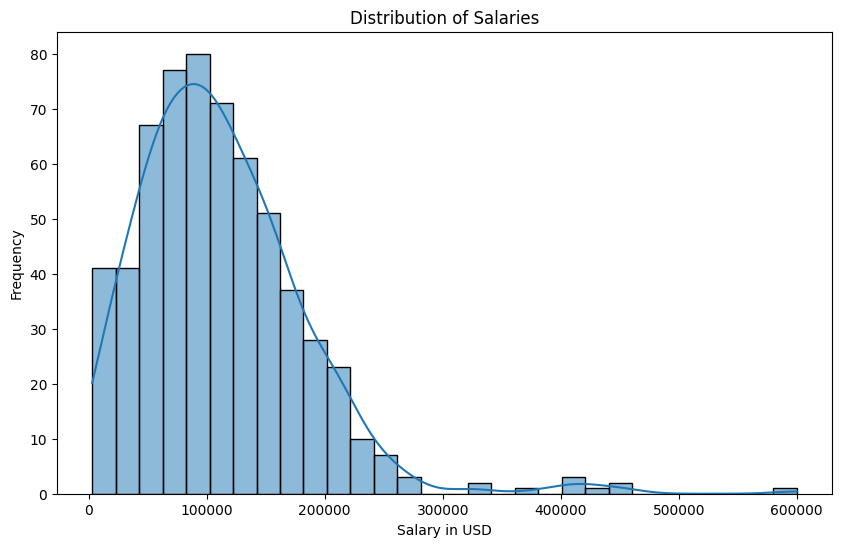

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['salary_in_usd'], bins=30, kde=True)
plt.title('Distribution of Salaries')
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.show()


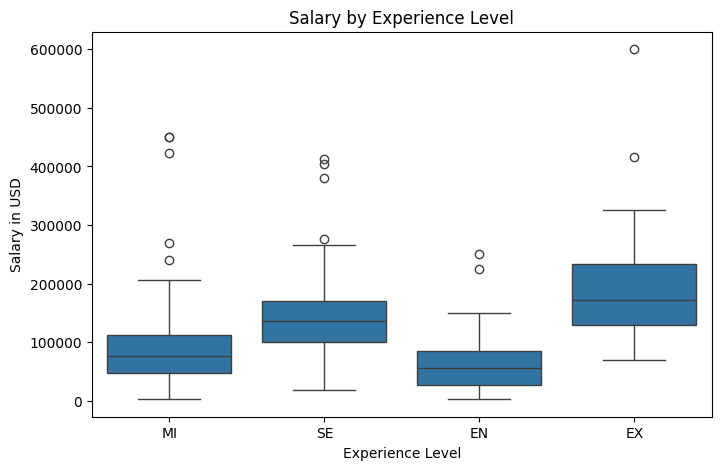

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='experience_level', y='salary_in_usd', data=df)
plt.title('Salary by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary in USD')
plt.show()


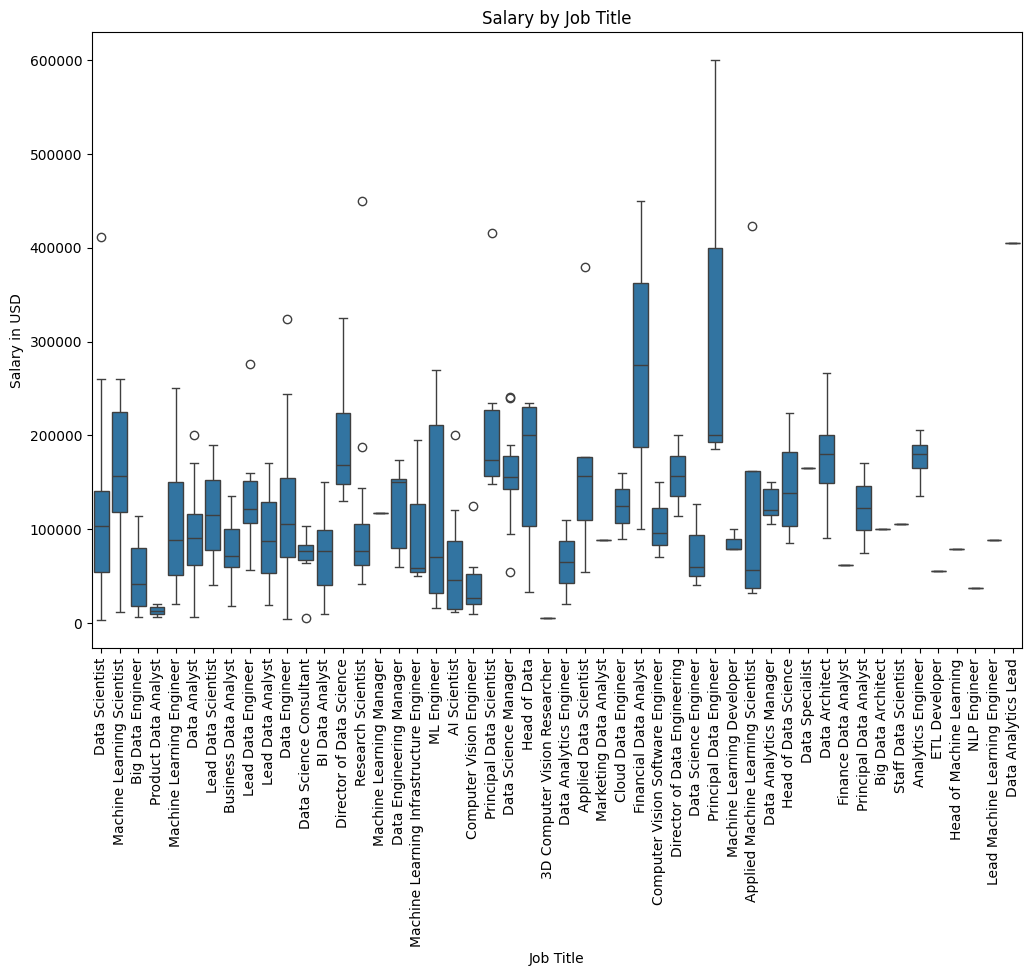

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='job_title', y='salary_in_usd', data=df)
plt.xticks(rotation=90)
plt.title('Salary by Job Title')
plt.xlabel('Job Title')
plt.ylabel('Salary in USD')
plt.show()


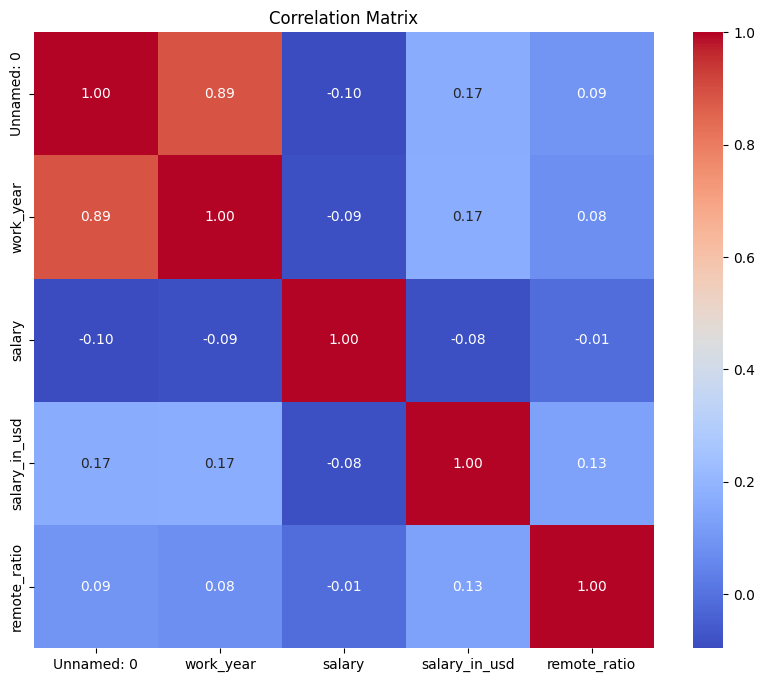

In [ ]:
# Select only numerical features for correlation analysis.
numerical_df = df.select_dtypes(include=np.number)

# Calculate the correlation matrix.
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Drop unnecessary or string columns if still present
df = df.drop(columns=['salary_currency'], errors='ignore')  # Adjust based on actual columns

# Encode all necessary categorical variables
df_encoded = pd.get_dummies(df, columns=['experience_level', 'employment_type', 'job_title',
                                         'employee_residence', 'company_location', 'company_size'])

# Define features and target
X = df_encoded.drop(columns=['salary_in_usd'])
y = df_encoded['salary_in_usd']

# Split and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 3455162784.1524267
R^2 Score: 0.09847347172043452


In [ ]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

# ... (your previous code) ...

# Ensure all columns in X and y are numeric
X = X.select_dtypes(include=np.number)
y = pd.to_numeric(y, errors='coerce') # Convert y to numeric, handling errors

# Add constant (intercept) to features
X_sm = sm.add_constant(X)
model_sm = sm.OLS(y, X_sm).fit()

# Print full summary (includes confidence intervals)
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:          salary_in_usd   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     7.689
Date:                Sat, 05 Apr 2025   Prob (F-statistic):           4.79e-06
Time:                        18:13:17   Log-Likelihood:                -7625.8
No. Observations:                 607   AIC:                         1.526e+04
Df Residuals:                     602   BIC:                         1.528e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -2.237e+07   1.78e+07     -1.257   

In [ ]:
from scipy import stats

# Test: Is mean salary significantly different from $100,000?
t_stat, p_val = stats.ttest_1samp(df['salary_in_usd'], 100000)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

# Conclusion
if p_val < 0.05:
    print("Reject null hypothesis: The mean salary is significantly different from $100,000.")
else:
    print("Fail to reject null: No significant difference from $100,000.")

# Mean and standard error
mean_salary = df['salary_in_usd'].mean()
sem_salary = stats.sem(df['salary_in_usd'])

# 95% confidence interval
ci = stats.t.interval(0.95, len(df)-1, loc=mean_salary, scale=sem_salary)
print(f"95% Confidence Interval for mean salary: {ci}")


T-statistic: 4.269995376558279
P-value: 2.2688287255787327e-05
Reject null hypothesis: The mean salary is significantly different from $100,000.
95% Confidence Interval for mean salary: (np.float64(106641.74701149788), np.float64(117953.99269196176))



Model Coefficient: [21249.22247787]
Model Intercept: 69071.79189746635
Mean Squared Error: 3388562407.279588
R² Score: 0.11585094719559075


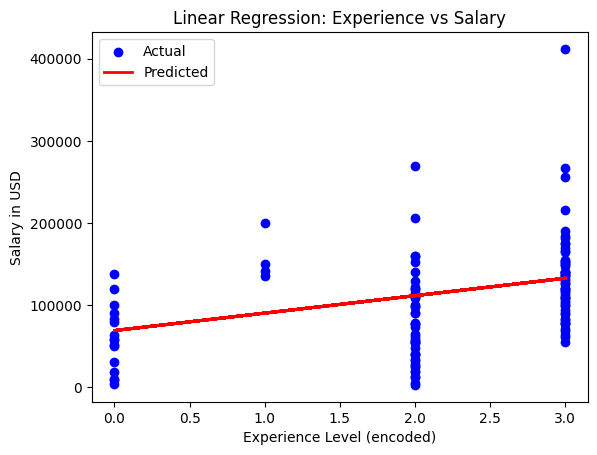

In [ ]:


# Encode 'experience_level' (categorical) to numeric
le = LabelEncoder()
df['experience_level_encoded'] = le.fit_transform(df['experience_level'])

# Feature (X) and Target (y)
X = df[['experience_level_encoded']]
y = df['salary_in_usd']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Metrics
print("\nModel Coefficient:", model.coef_)
print("Model Intercept:", model.intercept_)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# Plotting the results
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Experience Level (encoded)')
plt.ylabel('Salary in USD')
plt.title('Linear Regression: Experience vs Salary')
plt.legend()
plt.show()

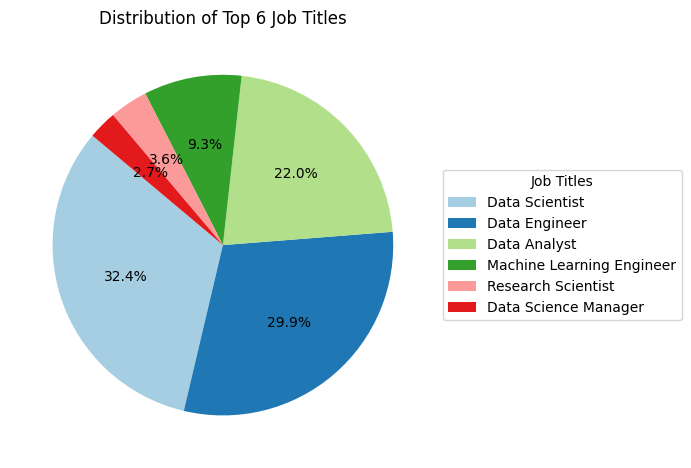

In [ ]:
# Top 6 most common job titles
job_counts = df['job_title'].value_counts().head(6)

# Pie Chart
plt.figure(figsize=(7, 7))
colors = plt.cm.Paired.colors  # Nice color palette

patches, texts, autotexts = plt.pie(
    job_counts,
    labels=None,  # Hide labels directly on pie
    autopct='%1.1f%%',
    startangle=140,
    colors=colors
)

# Add legend instead of labels on the pie
plt.legend(patches, job_counts.index, title="Job Titles", loc="center left", bbox_to_anchor=(1, 0.5))

plt.title('Distribution of Top 6 Job Titles')
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 1. Load the Dataset
df = pd.read_csv('/content/ds_salaries.csv')

# Strip any whitespace from column names
df.columns = df.columns.str.strip()

# Print column names to verify
print("Columns in dataset:", df.columns.tolist())

# 2. Identify the salary column dynamically
salary_col = None
for col in df.columns:
    if 'salary' in col.lower():
        salary_col = col
        break

if salary_col is None:
    raise KeyError("Salary column not found. Please check column names.")

print(f"Using '{salary_col}' as the target variable.")

# 3. Set up features and target
y = df[salary_col]
X = df.drop(columns=[salary_col])

# 4. Convert categorical variables using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# 5. Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# 6. Split Data into Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. EDA - Optional: Pairplot can be expensive if too many features
# sns.pairplot(df)
# plt.show()

# 8. Build Multiple Linear Regression Model
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)
model = sm.OLS(y_train, X_train_const).fit()

# Print model summary
print(model.summary())

# 9. Check Assumptions

# a. Residuals plot
plt.figure(figsize=(6, 4))
sns.residplot(x=model.fittedvalues, y=y_train - model.fittedvalues, lowess=True, line_kws={'color': 'red'})
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Plot")
plt.show()

# b. QQ plot
sm.qqplot(model.resid, line='45')
plt.title("QQ Plot")
plt.show()

# 10. Evaluate Model Performance
train_pred = model.predict(X_train_const)
test_pred = model.predict(X_test_const)

mse_train = mean_squared_error(y_train, train_pred)
mse_test = mean_squared_error(y_test, test_pred)
r2_train = r2_score(y_train, train_pred)
r2_test = r2_score(y_test, test_pred)

print(f"MSE (Train): {mse_train:.2f}, R² (Train): {r2_train:.2f}")
print(f"MSE (Test): {mse_test:.2f}, R² (Test): {r2_test:.2f}")

# 11. Actual vs Predicted
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': test_pred})
sns.scatterplot(x='Actual', y='Predicted', data=comparison_df)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary")
plt.show()


Columns in dataset: ['Unnamed: 0', 'work_year', 'experience_level', 'employment_type', 'job_title', 'salary', 'salary_currency', 'salary_in_usd', 'employee_residence', 'remote_ratio', 'company_location', 'company_size']
Using 'salary' as the target variable.

Missing Values:
Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

Columns in dataset: ['Unnamed: 0', 'work_year', 'experience_level', 'employment_type', 'job_title', 'salary', 'salary_currency', 'salary_in_usd', 'employee_residence', 'remote_ratio', 'company_location', 'company_size']
Using 'salary' as the target variable.

Missing Values:
Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64
                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     26.48
Date:                Tue, 15 Apr 2025   Prob (F-statistic):          1.83e-126
Time:                       

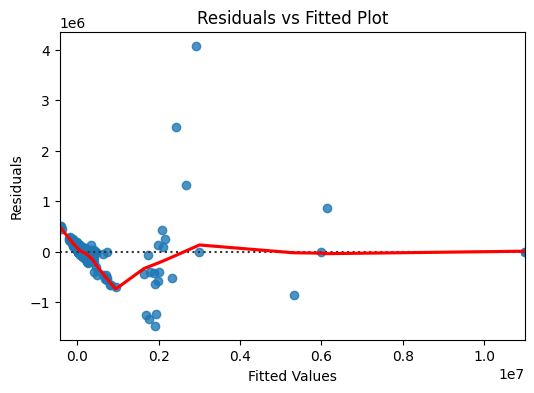

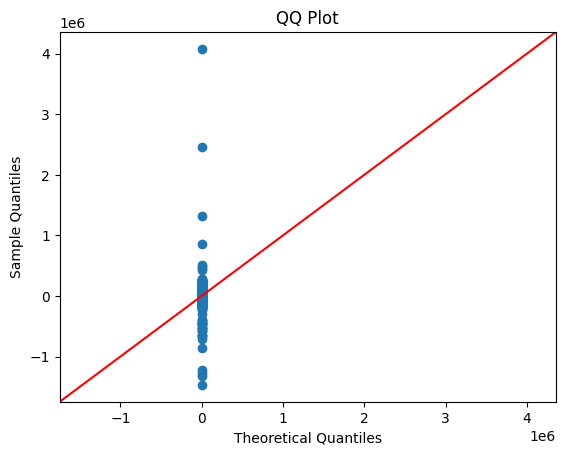

MSE (Train): 86725072416.67, R² (Train): 0.91
MSE (Test): 7748081677268.25, R² (Test): 0.04


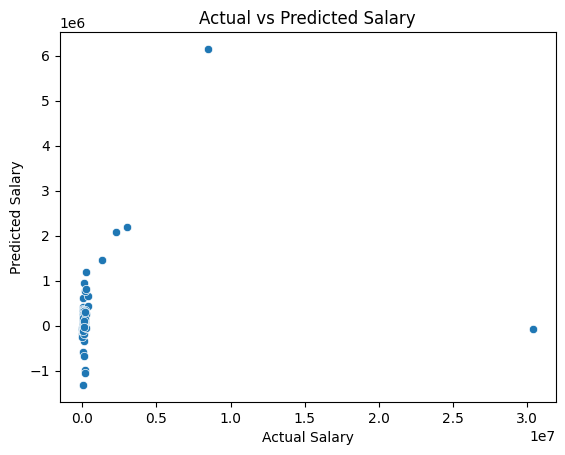

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 1. Load the Dataset
df = pd.read_csv('/content/ds_salaries.csv')

# Strip any whitespace from column names
df.columns = df.columns.str.strip()

# Print column names to verify
print("Columns in dataset:", df.columns.tolist())

# 2. Identify the salary column dynamically
salary_col = None
for col in df.columns:
    if 'salary' in col.lower():
        salary_col = col
        break

if salary_col is None:
    raise KeyError("Salary column not found. Please check column names.")

print(f"Using '{salary_col}' as the target variable.")

# 3. Set up features and target
y = df[salary_col]
X = df.drop(columns=[salary_col])

# 4. Convert categorical variables using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# 5. Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# 6. Split Data into Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. EDA - Optional: Pairplot can be expensive if too many features
# sns.pairplot(df)
# plt.show()

# 8. Build Multiple Linear Regression Model
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

#--- Ensure all columns are numeric before fitting the model ---
X_train_const = X_train_const.apply(pd.to_numeric, errors='coerce').astype(float)
y_train = pd.to_numeric(y_train, errors='coerce')


model = sm.OLS(y_train, X_train_const).fit()

# Print model summary
print(model.summary())

# 9. Check Assumptions

# a. Residuals plot
plt.figure(figsize=(6, 4))
sns.residplot(x=model.fittedvalues, y=y_train - model.fittedvalues, lowess=True, line_kws={'color': 'red'})
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Plot")
plt.show()

# b. QQ plot
sm.qqplot(model.resid, line='45')
plt.title("QQ Plot")
plt.show()

# 10. Evaluate Model Performance
train_pred = model.predict(X_train_const)
test_pred = model.predict(X_test_const)

mse_train = mean_squared_error(y_train, train_pred)
mse_test = mean_squared_error(y_test, test_pred)
r2_train = r2_score(y_train, train_pred)
r2_test = r2_score(y_test, test_pred)

print(f"MSE (Train): {mse_train:.2f}, R² (Train): {r2_train:.2f}")
print(f"MSE (Test): {mse_test:.2f}, R² (Test): {r2_test:.2f}")

# 11. Actual vs Predicted
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': test_pred})
sns.scatterplot(x='Actual', y='Predicted', data=comparison_df)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary")
plt.show()

In [ ]:
import pandas as pd
import scipy.stats as stats

# Load dataset
df = pd.read_csv('/content/ds_salaries.csv')

# Clean column names
df.columns = df.columns.str.strip()

# Identify salary column
salary_col = None
for col in df.columns:
    if 'salary' in col.lower():
        salary_col = col
        break

# Extract salary data (assuming it's in USD or consistent units)
salaries = df[salary_col].dropna()

# Hypothesis:
# H0: μ = 100000 (average salary is $100k)
# H1: μ > 100000 (average salary is greater than $100k)
pop_mean = 100000

# Calculate sample mean
sample_mean = salaries.mean()
print(f"Sample mean salary: ${sample_mean:.2f}")
print(f"Assumed population mean: ${pop_mean:.2f}")

# Perform one-sample t-test (one-tailed)
t_stat, p_value = stats.ttest_1samp(salaries, pop_mean)

# Since it's a one-tailed test (greater), divide p-value by 2
p_value_one_tailed = p_value / 2

# Significance level
alpha = 0.05

print(f"t-statistic: {t_stat:.4f}")
print(f"One-tailed p-value: {p_value_one_tailed:.4f}")

# Conclusion
if p_value_one_tailed < alpha and t_stat > 0:
    print("✅ Reject the null hypothesis: Average salary is significantly greater than $100,000.")
else:
    print("❌ Fail to reject the null hypothesis: No strong evidence that average salary exceeds $100,000.")


Sample mean salary: $324000.06
Assumed population mean: $100000.00
t-statistic: 3.5735
One-tailed p-value: 0.0002
✅ Reject the null hypothesis: Average salary is significantly greater than $100,000.
